In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog
from matplotlib import ticker

In [2]:
plt.rcParams.update({'font.size': 22})

# load data

In [3]:
## load data in Pangeo
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()

In [4]:
## embed in Grid objects
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X') 

In [5]:
## define useful constants
horispace01 = 1e3
horispace05 = 5e3
time_index = 0
depth = -50
f =  -0.83e-4
alpha = 2e-4
ybound = 2e5

# calculate vorticity and strain from velocities

In [6]:
depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01




depth = 0
vort05_0 = grid05.interp(grid05.interp((grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace05

strain05_0 = ((grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid05.interp(grid05.interp(grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') + grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace05



# calculate vorticity and strain from SSH using geostrophic balance

In [7]:
eta_xx_01 = grid01.diff(grid01.diff(ds01.Eta, 'X'), 'X')/horispace01**2 
eta_yy_01 = grid01.diff(grid01.diff(ds01.Eta, 'Y', boundary='extend'), 'Y', boundary='extend')/horispace01**2
eta_xy_01 = grid01.interp(grid01.interp(grid01.diff(grid01.diff(ds01.Eta, 'X'), 'Y', boundary='extend'), 'X'), 'Y', boundary='extend')/horispace01**2

In [8]:
eta_xx_05 = grid05.diff(grid05.diff(ds05.Eta, 'X'), 'X')/horispace05**2
eta_yy_05 = grid05.diff(grid05.diff(ds05.Eta, 'Y', boundary='extend'), 'Y', boundary='extend')/horispace05**2
eta_xy_05 = grid05.interp(grid05.interp(grid05.diff(grid05.diff(ds05.Eta, 'X'), 'Y', boundary='extend'), 'X'), 'Y', boundary='extend')/horispace05**2

In [10]:
vort01_gs = (eta_xx_01 + eta_yy_01)*9.8/f**2
strain01_gs = ((2*eta_xy_01)**2 + (eta_xx_01 - eta_yy_01)**2)**(0.5)*9.8/f**2

In [11]:
vort05_gs = (eta_xx_05 + eta_yy_05)*9.8/f**2
strain05_gs = ((2*eta_xy_05)**2 + (eta_xx_05 - eta_yy_05)**2)**(0.5)*9.8/f**2

# plot local vorticity fields

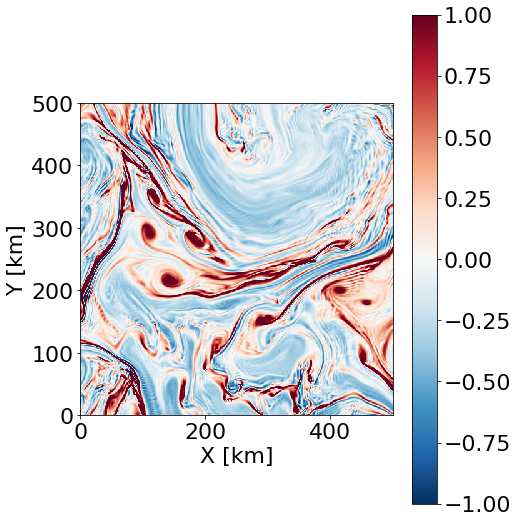

In [20]:
fig, ax = plt.subplots(figsize=(7,9))

im = ax.pcolormesh(vort01_0.XC.isel(XC=slice(0, 500)).values/1000, vort01_0.YC.isel(YC=slice(0, 500)).values/1000, (vort01_0.isel(XC=slice(1000, 1500), YC=slice(1000, 1500))/f).rename('').isel(time=10), vmax=1,vmin=-1,cmap ='RdBu_r', rasterized=True)
ax.set_xlabel("X [km]")
ax.set_ylabel("Y [km]")
ax.set_aspect('equal')
fig.colorbar(im)
# fig.colorbar(im, orientation="horizontal", pad=0.2)

ax.set_xlim(0,500)
ax.set_ylim(0,500)


plt.savefig("fig5_vor01.pdf", bbox_inches = "tight")



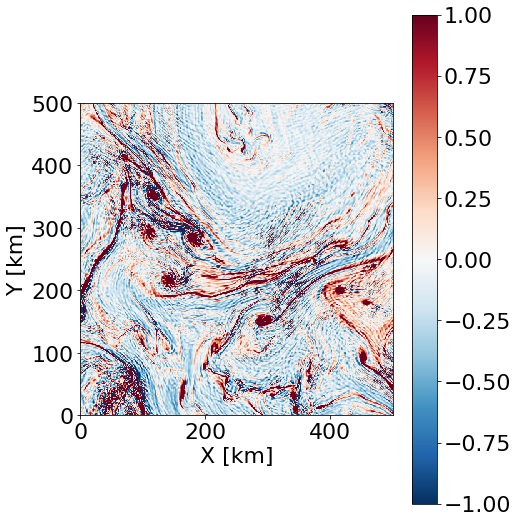

In [16]:
fig, ax = plt.subplots(figsize=(7,9))

im = ax.pcolormesh(vort01_0.XC.isel(XC=slice(0, 500)).values/1000, vort01_0.YC.isel(YC=slice(0, 500)).values/1000, (vort01_gs.isel(XC=slice(1000, 1500), YC=slice(1000, 1500))).rename('').isel(time=10), vmax=1,vmin=-1,cmap ='RdBu_r', rasterized=True)
ax.set_xlabel("X [km]")
ax.set_ylabel("Y [km]")
ax.set_aspect('equal')
fig.colorbar(im)

ax.set_xlim(0,500)
ax.set_ylim(0,500)

plt.savefig("fig5_vor01_gs.pdf", bbox_inches = "tight")



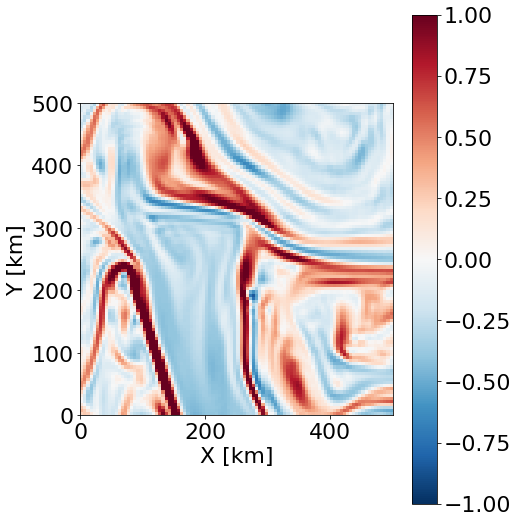

In [21]:
fig, ax = plt.subplots(figsize=(7,9))

im = ax.pcolormesh(vort05_0.XC.isel(XC=slice(0, 100)).values/1000, vort05_0.YC.isel(YC=slice(0, 100)).values/1000, (vort05_0.isel(XC=slice(200, 300), YC=slice(200, 300))/f).isel(time=10), vmax=1,vmin=-1,cmap ='RdBu_r', rasterized=True)
ax.set_xlabel("X [km]")
ax.set_ylabel("Y [km]")
ax.set_aspect('equal')
fig.colorbar(im)

ax.set_xlim(0,500)
ax.set_ylim(0,500)

plt.savefig("fig5_vor05.pdf", bbox_inches = "tight")



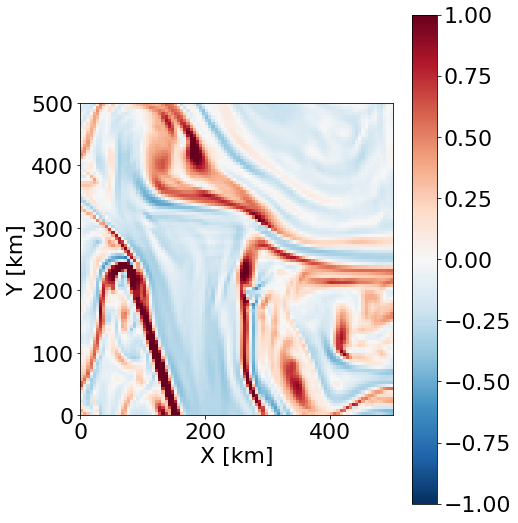

In [22]:
fig, ax = plt.subplots(figsize=(7,9))

im = ax.pcolormesh(vort05_0.XC.isel(XC=slice(0, 100)).values/1000, vort05_0.YC.isel(YC=slice(0, 100)).values/1000, (vort05_gs.isel(XC=slice(200, 300), YC=slice(200, 300))).rename('').isel(time=10), vmax=1,vmin=-1,cmap ='RdBu_r', rasterized=True)
ax.set_xlabel("X [km]")
ax.set_ylabel("Y [km]")
ax.set_aspect('equal')
fig.colorbar(im)

ax.set_xlim(0,500)
ax.set_ylim(0,500)

plt.savefig("fig5_vor05_gs.pdf", bbox_inches = "tight")



# calculate vorticity-strain joint distributions 

In [23]:
vortband01 = np.linspace(-7, 7, 240)
strainband01 = np.linspace(.5e-3, 7, 240)
binbox01 =  (vortband01[1]-vortband01[0])*(strainband01[1]-strainband01[0])

In [ ]:
vort_01_0 = (vort01_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_01_0 = (abs(strain01_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


hist01 = histogram(vort_01_0,strain_01_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hist01.load()

In [ ]:
vort_01_gs = (vort01_gs.sel(YC = slice(ybound,2e6-ybound))).rename('vort1_0')
strain_01_gs = (strain01_gs.sel(YC = slice(ybound,2e6-ybound))).rename('strain1_0')


hist01_gs = histogram(vort_01_gs, strain_01_gs, dim = ['XC','YC'] , bins=[vortband01,strainband01])
hist01_gs.load()

In [26]:
bband05 = np.linspace(-4, 4, 120)
cband05 = np.linspace(0, 4, 120)

binbox05 =  (bband05[1]-bband05[0])*(cband05[1]-cband05[0])

In [ ]:
vort_05_0 = (vort05_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_05_0 = (abs(strain05_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


hist05 = histogram(vort_05_0,strain_05_0,dim = ['XC','YC'] , bins=[bband05, cband05])
hist05.load()

In [ ]:
vort_05_gs = (vort05_gs.sel(YC = slice(ybound,2e6-ybound))).rename('vort1_0')
strain_05_gs = (strain05_gs.sel(YC = slice(ybound,2e6-ybound))).rename('strain1_0')


hist05_gs = histogram(vort_05_gs, strain_05_gs, dim = ['XC','YC'] , bins=[bband05, cband05])
hist05_gs.load()

/tmp/ipykernel_473/1337601929.py:11: UserWarning: The following kwargs were not used by contour: 'rasterized'
  im00 = ax[0,0].contourf(temp20.vort1_0_bin, temp20.strain1_0_bin, temp20,
/tmp/ipykernel_473/1337601929.py:30: UserWarning: The following kwargs were not used by contour: 'rasterized'
  im01 = ax[0,1].contourf(temp20.vort1_0_bin, temp20.strain1_0_bin, temp20,
/tmp/ipykernel_473/1337601929.py:52: UserWarning: The following kwargs were not used by contour: 'rasterized'
  im02 = ax[1,0].contourf(temp20.vort1_0_bin, temp20.strain1_0_bin, temp20,
/tmp/ipykernel_473/1337601929.py:71: UserWarning: The following kwargs were not used by contour: 'rasterized'
  im03 = ax[1,1].contourf(temp20.vort1_0_bin, temp20.strain1_0_bin, temp20,


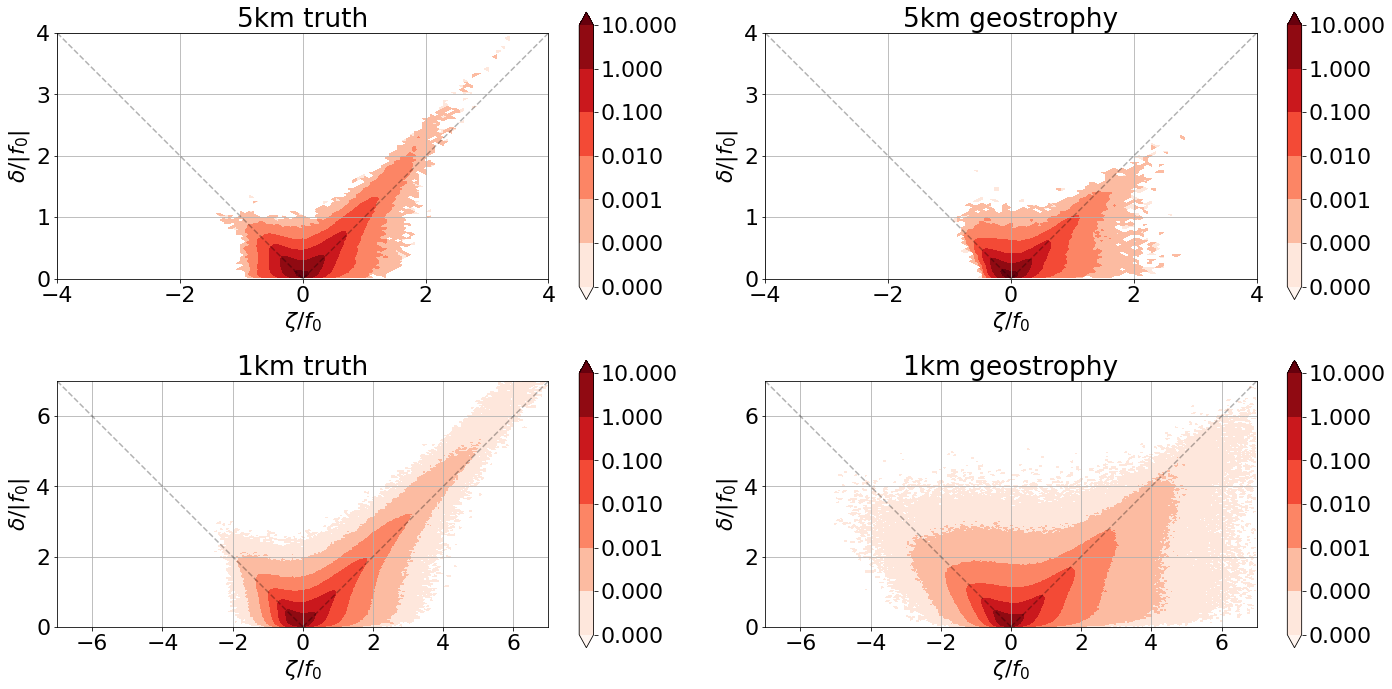

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))




girbNums01 = 320*400


temp20 = (1/(binbox05*girbNums01)*(hist05.mean(dim='time').rename('')).T)
temp20 = xr.where(temp20<1e-5,np.nan,temp20)
im00 = ax[0,0].contourf(temp20.vort1_0_bin, temp20.strain1_0_bin, temp20, 
             locator=ticker.LogLocator(), levels = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1],  cmap='Reds', extend='both', rasterized=True)

h00 = fig.colorbar(im00, ax=ax[0,0])
ax[0,0].set_title('5km truth')
ax[0,0].set_aspect('equal')
ax[0,0].plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
ax[0,0].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[0,0].set_xlabel('$\zeta/f_0$')
ax[0,0].set_ylabel('$\delta/|f_0|$')
ax[0,0].set_ylim(0,4)
ax[0,0].set_xlim(-4,4)
ax[0,0].set_xticks([-4, -2, 0, 2, 4])
ax[0,0].grid()



temp20 = (1/(binbox05*girbNums01)*(hist05_gs.mean(dim='time').rename('')).T)
temp20 = xr.where(temp20<1e-5,np.nan,temp20)
im01 = ax[0,1].contourf(temp20.vort1_0_bin, temp20.strain1_0_bin, temp20, 
             locator=ticker.LogLocator(), levels = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1],  cmap='Reds', extend='both', rasterized=True)

h01 = fig.colorbar(im01, ax=ax[0,1])
ax[0,1].set_title('5km geostrophy')
ax[0,1].set_aspect('equal')
ax[0,1].plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
ax[0,1].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[0,1].set_xlabel('$\zeta/f_0$')
ax[0,1].set_ylabel('$\delta/|f_0|$')
ax[0,1].set_ylim(0,4)
ax[0,1].set_xlim(-4,4)
ax[0,1].set_xticks([-4, -2, 0, 2, 4])
ax[0,1].grid()




girbNums01 = 1600*2000

temp20 = (1/(binbox01*girbNums01)*(hist01.mean(dim='time').rename('')).T)
temp20 = xr.where(temp20<1e-5,np.nan,temp20)
im02 = ax[1,0].contourf(temp20.vort1_0_bin, temp20.strain1_0_bin, temp20, 
             locator=ticker.LogLocator(), levels = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1],  cmap='Reds', extend='both', rasterized=True)

h02 = fig.colorbar(im02, ax=ax[1,0])
ax[1,0].set_title('1km truth')
ax[1,0].set_aspect('equal')
ax[1,0].plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
ax[1,0].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[1,0].set_xlabel('$\zeta/f_0$')
ax[1,0].set_ylabel('$\delta/|f_0|$')
ax[1,0].set_ylim(0, 7)
ax[1,0].set_xlim(-7, 7)
ax[1,0].set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax[1,0].grid()



temp20 = (1/(binbox01*girbNums01)*(hist01_gs.mean(dim='time').rename('')).T)
temp20 = xr.where(temp20<1e-5,np.nan,temp20)
im03 = ax[1,1].contourf(temp20.vort1_0_bin, temp20.strain1_0_bin, temp20, 
             locator=ticker.LogLocator(), levels = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1],  cmap='Reds', extend='both', rasterized=True)

h03 = fig.colorbar(im03, ax=ax[1,1])
ax[1,1].set_title('1km geostrophy')
ax[1,1].set_aspect('equal')
ax[1,1].plot(np.linspace(0,-7,29),np.linspace(0,7,29),'k--',alpha=.3)
ax[1,1].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[1,1].set_xlabel('$\zeta/f_0$')
ax[1,1].set_ylabel('$\delta/|f_0|$')
ax[1,1].set_ylim(0,7)
ax[1,1].set_xlim(-7,7)
ax[1,1].set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax[1,1].grid()

plt.tight_layout()
plt.savefig("fig5_jpdf.pdf", bbox_inches = "tight")